# Importation des données

In [3]:
import pandas as pd 
import numpy as np

# Importer les données
customers_df = pd.read_csv('customers.csv')
products_df = pd.read_csv('products.csv')
transactions_df = pd.read_csv('transactions.csv')

# Afficher les premières lignes de chaque dataset pour avoir un aperçu des données
print("Aperçu des données Clients :")
display(customers_df.head())

print("\nAperçu des données Produits :")
display(products_df.head())

print("\nAperçu des données Transactions :")
display(transactions_df.head())

Aperçu des données Clients :


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943



Aperçu des données Produits :


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0



Aperçu des données Transactions :


,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


# Outer transactions-produits

In [4]:
import pandas as pd

# Données clients
produits_data =products_df 
# Données transactions
transactions_data = transactions_df

# Convertir les données en DataFrame
products_df = pd.DataFrame(produits_data)
transactions_df = pd.DataFrame(transactions_data)


# Fusionner les données transactions avec les données clients sur la colonne 'client_id'
merged_transactions_products_df = pd.merge(transactions_df, products_df , on='id_prod', how='outer')

display(merged_transactions_products_df)
# Outer transactions-produits

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0.0
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0.0
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0.0
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0.0
...,...,...,...,...,...,...
337033,0_525,NaN,NaN,NaN,2.99,0.0
337034,2_86,NaN,NaN,NaN,132.36,2.0
337035,0_299,NaN,NaN,NaN,22.99,0.0
337036,0_510,NaN,NaN,NaN,23.66,0.0


# Estimation de prix avec KNNinputer

In [6]:
from sklearn.impute import KNNImputer


In [7]:
data =merged_transactions_products_df

df = pd.DataFrame(data)

df.loc[df['id_prod'] == '0_2245', 'categ'] = df.loc[df['id_prod'] == '0_2245', 'categ'].fillna(0)

display(df)

desired_row = df[df['id_prod'] == '0_2245']
display(desired_row)


categ_0_df = df[df['categ'] == 0]

imputer = KNNImputer(n_neighbors=2) 
categ_0_df[['price']] = imputer.fit_transform(categ_0_df[['price']])
df.loc[df['categ'] == 0, 'price'] = categ_0_df['price']

display(df)

desired_row = df[df['id_prod'] == '0_2245']
display(desired_row)

,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0.0
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0.0
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0.0
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0.0
...,...,...,...,...,...,...
337033,0_525,NaN,NaN,NaN,2.99,0.0
337034,2_86,NaN,NaN,NaN,132.36,2.0
337035,0_299,NaN,NaN,NaN,22.99,0.0
337036,0_510,NaN,NaN,NaN,23.66,0.0


,id_prod,date,session_id,client_id,price,categ
307991,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,NaN,0.0
307992,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,NaN,0.0
307993,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,NaN,0.0
307994,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,NaN,0.0
307995,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,NaN,0.0
...,...,...,...,...,...,...
308089,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,NaN,0.0
308090,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,NaN,0.0
308091,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,NaN,0.0
308092,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,NaN,0.0


/tmp/ipykernel_94442/380513193.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categ_0_df[['price']] = imputer.fit_transform(categ_0_df[['price']])


,id_prod,date,session_id,client_id,price,categ
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0
1,0_1483,2021-10-18 19:16:14.767807,s_106741,c_1576,4.99,0.0
2,0_1483,2021-11-14 11:11:45.276771,s_119491,c_182,4.99,0.0
3,0_1483,2021-07-30 19:37:16.087057,s_69222,c_1196,4.99,0.0
4,0_1483,2021-03-30 14:18:13.403218,s_13545,c_2890,4.99,0.0
...,...,...,...,...,...,...
337033,0_525,NaN,NaN,NaN,2.99,0.0
337034,2_86,NaN,NaN,NaN,132.36,2.0
337035,0_299,NaN,NaN,NaN,22.99,0.0
337036,0_510,NaN,NaN,NaN,23.66,0.0


,id_prod,date,session_id,client_id,price,categ
307991,0_2245,2021-06-17 03:03:12.668129,s_49705,c_1533,10.635961,0.0
307992,0_2245,2021-06-16 05:53:01.627491,s_49323,c_7954,10.635961,0.0
307993,0_2245,2021-11-24 17:35:59.911427,s_124474,c_5120,10.635961,0.0
307994,0_2245,2022-02-28 18:08:49.875709,s_172304,c_4964,10.635961,0.0
307995,0_2245,2021-03-01 00:09:29.301897,s_3,c_580,10.635961,0.0
...,...,...,...,...,...,...
308089,0_2245,2021-04-06 19:59:19.462288,s_16936,c_4167,10.635961,0.0
308090,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,10.635961,0.0
308091,0_2245,2021-12-03 14:14:40.444177,s_128815,c_6189,10.635961,0.0
308092,0_2245,2021-04-27 18:58:47.703374,s_26624,c_1595,10.635961,0.0


# jointure finale de tout les fichier

In [10]:
final_merge= pd.merge(merged_transactions_products_df,customers_df, on= 'client_id', how='inner')
display(final_merge)


,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977
...,...,...,...,...,...,...,...,...
337011,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,f,1967
337012,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,m,1933
337013,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,m,1933
337014,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,f,1970


# Dates invalides

In [11]:
import pandas as pd

# Données de l'exemple
data = final_merge

df = pd.DataFrame(data)

# Filtrer les dates qui ne sont pas au format date
invalid_dates = df[~df['date'].str.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}.\d{6}$')]
type_invalid=invalid_dates.shape

display("Dates qui ne sont pas au format date :\n", type_invalid)


'Dates qui ne sont pas au format date :\n'

(200, 8)

In [12]:
display("Dates qui ne sont pas au format date :\n", invalid_dates)


'Dates qui ne sont pas au format date :\n'

,id_prod,date,session_id,client_id,price,categ,sex,birth
336768,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,-1.0,0.0,m,2001
336769,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1,-1.0,0.0,m,2001
336770,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1,-1.0,0.0,m,2001
336771,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1,-1.0,0.0,m,2001
336772,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1,-1.0,0.0,m,2001
...,...,...,...,...,...,...,...,...
336963,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_0,-1.0,0.0,f,2001
336964,T_0,test_2021-03-01 02:30:02.237438,s_0,ct_0,-1.0,0.0,f,2001
336965,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,-1.0,0.0,f,2001
336966,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0,-1.0,0.0,f,2001


# Suppression des dates invalides

In [13]:
supp_invalide_date= final_merge[final_merge['session_id']!='s_0']

display(supp_invalide_date)

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,4.99,0.0,f,1977
1,0_1085,2021-09-29 11:14:59.793823,s_97382,c_4450,3.99,0.0,f,1977
2,0_1453,2021-08-27 19:50:46.796939,s_81509,c_4450,7.99,0.0,f,1977
3,0_1405,2021-08-27 20:07:25.878440,s_81509,c_4450,4.99,0.0,f,1977
4,0_1392,2021-12-28 11:45:04.072281,s_141302,c_4450,6.30,0.0,f,1977
...,...,...,...,...,...,...,...,...
337011,1_607,2021-09-25 07:26:00.224331,s_95185,c_4786,26.99,1.0,f,1967
337012,1_673,2021-06-01 00:49:49.781631,s_42350,c_2793,12.99,1.0,m,1933
337013,0_2075,2021-10-09 09:03:48.268536,s_102200,c_2793,8.99,0.0,m,1933
337014,0_1692,2021-09-15 19:42:08.596375,s_90430,c_4478,13.36,0.0,f,1970


# nombre de produits non vendus

In [14]:
# Compter le nombre de produits non vendus
non_sold_products = len(set(products_df['id_prod']) - set(transactions_df['id_prod']))
print("Nombre de produits non vendus :", non_sold_products)


Nombre de produits non vendus : 22


In [15]:
# Liste des produits non vendus
non_sold_products_list = set(products_df['id_prod']) - set(transactions_df['id_prod'])

# Afficher la liste des produits non vendus
print("Liste des produits non vendus :", non_sold_products_list)


Liste des produits non vendus : {'0_1800', '1_0', '0_310', '2_72', '0_1014', '0_1624', '0_525', '2_87', '0_1062', '0_1780', '0_510', '0_2308', '0_322', '0_1318', '2_86', '0_1025', '0_1119', '0_1620', '1_394', '0_299', '0_1016', '0_1645'}


# Nombre de client sans achat

In [18]:
# Initialisation de la variable nombre de clients sans achat
nombre_de_clients_sans_achat = 0

# Trouver les clients qui n'ont pas fait d'achat
clients_sans_achat = set(customers_df['client_id']) - set(transactions_df['client_id'])

# Parcourir les clients sans achat pour incrémenter le nombre de clients sans achat
for client in clients_sans_achat:
    nombre_de_clients_sans_achat += 1

# Afficher le nombre de clients sans achat
print("Nombre de clients n'ayant pas effectué d'achat :", nombre_de_clients_sans_achat)


Nombre de clients n'ayant pas effectué d'achat : 21


In [19]:
# Liste des produits non vendus
clients_sans_achat_list = set(customers_df['client_id']) - set(transactions_df['client_id'])

# Afficher la liste des produits non vendus
print("Liste des produits non vendus :", clients_sans_achat_list)


Liste des produits non vendus : {'c_3526', 'c_4447', 'c_90', 'c_587', 'c_3017', 'c_2706', 'c_8381', 'c_3789', 'c_5223', 'c_5245', 'c_6862', 'c_3443', 'c_7584', 'c_4406', 'c_4086', 'c_6735', 'c_1223', 'c_6930', 'c_8253', 'c_4358', 'c_862'}


# Fréquence count distincte par session id

In [20]:
import pandas as pd

# Supposons que sorted_total_df soit déjà défini

# Créer un DataFrame avec vos données
data = supp_invalide_date
df = pd.DataFrame(data)

# Calculer le nombre de sessions distinctes et la somme des prix par client_id
grouped_df = df.groupby('client_id').agg(
    frequence_count=('session_id', 'nunique'),
    total_price=('price', 'sum'),
).reset_index()

# Join pour conserver une seule ligne par client_id
result_df = pd.merge(df[['client_id', 'id_prod', 'date', 'categ', 'sex', 'birth']], grouped_df, on='client_id').drop_duplicates(subset=['client_id'])
display(result_df)


,client_id,id_prod,date,categ,sex,birth,frequence_count,total_price
0,c_4450,0_1483,2021-04-10 18:37:28.723910,0.0,f,1977,44,1186.65
100,c_1576,0_1483,2021-10-18 19:16:14.767807,0.0,m,1956,40,886.74
150,c_182,0_1483,2021-11-14 11:11:45.276771,0.0,f,1984,64,1789.54
292,c_1196,0_1483,2021-07-30 19:37:16.087057,0.0,m,1980,29,1020.89
368,c_2890,0_1483,2021-03-30 14:18:13.403218,0.0,f,1982,21,512.58
...,...,...,...,...,...,...,...,...
336810,c_4540,2_147,2021-12-05 00:31:15.530765,2.0,m,2003,1,181.99
336811,c_4786,1_607,2021-09-25 07:26:00.224331,1.0,f,1967,1,26.99
336812,c_2793,1_673,2021-06-01 00:49:49.781631,1.0,m,1933,2,21.98
336814,c_4478,0_1692,2021-09-15 19:42:08.596375,0.0,f,1970,1,13.36


# Panier moyen ca/fréquence

In [21]:
import pandas as pd

# Supposons que sorted_total_df soit déjà défini

# Créer un DataFrame avec vos données
data = result_df
df_panier_moyen = pd.DataFrame(data)

# Calculer le panier moyen par fréquence pour chaque client
df_panier_moyen['panier_moyen_freq'] = df_panier_moyen['total_price'] / df_panier_moyen['frequence_count']

# Afficher le DataFrame avec le panier moyen par fréquence
display(df_panier_moyen)


,client_id,id_prod,date,categ,sex,birth,frequence_count,total_price,panier_moyen_freq
0,c_4450,0_1483,2021-04-10 18:37:28.723910,0.0,f,1977,44,1186.65,26.969318
100,c_1576,0_1483,2021-10-18 19:16:14.767807,0.0,m,1956,40,886.74,22.168500
150,c_182,0_1483,2021-11-14 11:11:45.276771,0.0,f,1984,64,1789.54,27.961562
292,c_1196,0_1483,2021-07-30 19:37:16.087057,0.0,m,1980,29,1020.89,35.203103
368,c_2890,0_1483,2021-03-30 14:18:13.403218,0.0,f,1982,21,512.58,24.408571
...,...,...,...,...,...,...,...,...,...
336810,c_4540,2_147,2021-12-05 00:31:15.530765,2.0,m,2003,1,181.99,181.990000
336811,c_4786,1_607,2021-09-25 07:26:00.224331,1.0,f,1967,1,26.99,26.990000
336812,c_2793,1_673,2021-06-01 00:49:49.781631,1.0,m,1933,2,21.98,10.990000
336814,c_4478,0_1692,2021-09-15 19:42:08.596375,0.0,f,1970,1,13.36,13.360000


# Pivot CA par catégorie et par client

In [22]:
import pandas as pd

# Supposons que sorted_total_df soit déjà défini

# Créer un DataFrame avec vos données
data = supp_invalide_date

df = pd.DataFrame(data)

# Créer la table pivot avec le chiffre d'affaires par catégorie
pivot_table = pd.pivot_table(df, index='client_id', columns='categ', values='price', aggfunc='sum', fill_value=0).reset_index()

# Renommer les colonnes
pivot_table.columns = ['client_id', 'CA_categ-0', 'CA_categ-1', 'CA_categ-2']

display(pivot_table)


,client_id,CA_categ-0,CA_categ-1,CA_categ-2
0,c_1,174.20,71.58,54.87
1,c_10,124.92,391.27,69.99
2,c_100,31.38,52.96,138.53
3,c_1000,169.85,810.17,0.00
4,c_1001,527.81,274.64,300.00
...,...,...,...,...
8595,c_995,55.34,63.74,0.00
8596,c_996,204.70,534.90,0.00
8597,c_997,84.86,158.92,329.11
8598,c_998,88.17,108.06,1331.46


# Merge des CA par catégorie et par client


In [23]:

merge_categ= pd.merge(df_panier_moyen,pivot_table, on= 'client_id', how='inner')
display(merge_categ)


,client_id,id_prod,date,categ,sex,birth,frequence_count,total_price,panier_moyen_freq,CA_categ-0,CA_categ-1,CA_categ-2
0,c_4450,0_1483,2021-04-10 18:37:28.723910,0.0,f,1977,44,1186.65,26.969318,800.43,386.22,0.00
1,c_1576,0_1483,2021-10-18 19:16:14.767807,0.0,m,1956,40,886.74,22.168500,207.93,519.82,158.99
2,c_182,0_1483,2021-11-14 11:11:45.276771,0.0,f,1984,64,1789.54,27.961562,1205.91,534.02,49.61
3,c_1196,0_1483,2021-07-30 19:37:16.087057,0.0,m,1980,29,1020.89,35.203103,541.88,435.02,43.99
4,c_2890,0_1483,2021-03-30 14:18:13.403218,0.0,f,1982,21,512.58,24.408571,308.83,203.75,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
8595,c_4540,2_147,2021-12-05 00:31:15.530765,2.0,m,2003,1,181.99,181.990000,0.00,0.00,181.99
8596,c_4786,1_607,2021-09-25 07:26:00.224331,1.0,f,1967,1,26.99,26.990000,0.00,26.99,0.00
8597,c_2793,1_673,2021-06-01 00:49:49.781631,1.0,m,1933,2,21.98,10.990000,8.99,12.99,0.00
8598,c_4478,0_1692,2021-09-15 19:42:08.596375,0.0,f,1970,1,13.36,13.360000,13.36,0.00,0.00


# La recence

In [24]:
import pandas as pd
from datetime import datetime

# Supposons que vous avez déjà les informations données sous forme d'un DataFrame nommé 'df'

# Convertir la colonne 'date' en format datetime si ce n'est pas déjà le cas
df['date'] = pd.to_datetime(df['date'])

# Définir la date du système en tant qu'objet datetime
date_systeme = datetime.now()

# 1. Grouper les données par client_id et calculer la dernière date pour chaque client
derniere_date_par_client = df.groupby('client_id')['date'].max()

# 3. Calculer le nombre de jours écoulés depuis la dernière connexion à la date du système
jours_ecoules_par_client = (date_systeme - derniere_date_par_client).dt.days

# Renommer la série pour l'intégrer dans le DataFrame
jours_ecoules_par_client = jours_ecoules_par_client.rename("recence")

# Afficher le nombre de jours écoulés depuis la dernière connexion par client
print(jours_ecoules_par_client)


client_id
c_1       776
c_10      825
c_100     950
c_1000    749
c_1001    750
         ... 
c_995     865
c_996     770
c_997     803
c_998     753
c_999     754
Name: recence, Length: 8600, dtype: int64


# Merge 

In [25]:

jours_ecoules_df= pd.merge(merge_categ,jours_ecoules_par_client, on= 'client_id', how='inner')
display(jours_ecoules_df)


,client_id,id_prod,date,categ,sex,birth,frequence_count,total_price,panier_moyen_freq,CA_categ-0,CA_categ-1,CA_categ-2,recence
0,c_4450,0_1483,2021-04-10 18:37:28.723910,0.0,f,1977,44,1186.65,26.969318,800.43,386.22,0.00,767
1,c_1576,0_1483,2021-10-18 19:16:14.767807,0.0,m,1956,40,886.74,22.168500,207.93,519.82,158.99,757
2,c_182,0_1483,2021-11-14 11:11:45.276771,0.0,f,1984,64,1789.54,27.961562,1205.91,534.02,49.61,754
3,c_1196,0_1483,2021-07-30 19:37:16.087057,0.0,m,1980,29,1020.89,35.203103,541.88,435.02,43.99,751
4,c_2890,0_1483,2021-03-30 14:18:13.403218,0.0,f,1982,21,512.58,24.408571,308.83,203.75,0.00,753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8595,c_4540,2_147,2021-12-05 00:31:15.530765,2.0,m,2003,1,181.99,181.990000,0.00,0.00,181.99,834
8596,c_4786,1_607,2021-09-25 07:26:00.224331,1.0,f,1967,1,26.99,26.990000,0.00,26.99,0.00,905
8597,c_2793,1_673,2021-06-01 00:49:49.781631,1.0,m,1933,2,21.98,10.990000,8.99,12.99,0.00,891
8598,c_4478,0_1692,2021-09-15 19:42:08.596375,0.0,f,1970,1,13.36,13.360000,13.36,0.00,0.00,914


In [26]:
import pandas as pd
from datetime import datetime

# Création du DataFrame à partir des données fournies
data =jours_ecoules_df
df = pd.DataFrame(data)

# Convertir la colonne 'birth' en format datetime si ce n'est pas déjà le cas
df['birth'] = pd.to_datetime(df['birth'], format='%Y')

# Définir la date du système en tant qu'objet datetime
date_systeme = datetime.now()

# Calculer l'âge des clients en utilisant la date du système
df['age'] = date_systeme.year - df['birth'].dt.year

# Afficher le DataFrame avec la nouvelle colonne 'age'
display(df)


,client_id,id_prod,date,categ,sex,birth,frequence_count,total_price,panier_moyen_freq,CA_categ-0,CA_categ-1,CA_categ-2,recence,age
0,c_4450,0_1483,2021-04-10 18:37:28.723910,0.0,f,1977-01-01,44,1186.65,26.969318,800.43,386.22,0.00,767,47
1,c_1576,0_1483,2021-10-18 19:16:14.767807,0.0,m,1956-01-01,40,886.74,22.168500,207.93,519.82,158.99,757,68
2,c_182,0_1483,2021-11-14 11:11:45.276771,0.0,f,1984-01-01,64,1789.54,27.961562,1205.91,534.02,49.61,754,40
3,c_1196,0_1483,2021-07-30 19:37:16.087057,0.0,m,1980-01-01,29,1020.89,35.203103,541.88,435.02,43.99,751,44
4,c_2890,0_1483,2021-03-30 14:18:13.403218,0.0,f,1982-01-01,21,512.58,24.408571,308.83,203.75,0.00,753,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8595,c_4540,2_147,2021-12-05 00:31:15.530765,2.0,m,2003-01-01,1,181.99,181.990000,0.00,0.00,181.99,834,21
8596,c_4786,1_607,2021-09-25 07:26:00.224331,1.0,f,1967-01-01,1,26.99,26.990000,0.00,26.99,0.00,905,57
8597,c_2793,1_673,2021-06-01 00:49:49.781631,1.0,m,1933-01-01,2,21.98,10.990000,8.99,12.99,0.00,891,91
8598,c_4478,0_1692,2021-09-15 19:42:08.596375,0.0,f,1970-01-01,1,13.36,13.360000,13.36,0.00,0.00,914,54


# Tableau final 

In [27]:
# Sélection des colonnes spécifiées
final_table = jours_ecoules_df.loc[:, ['client_id', 'sex', 'age', 'frequence_count', 'total_price', 'panier_moyen_freq', 'recence', 'CA_categ-0', 'CA_categ-1', 'CA_categ-2']]
#frequence count est le nombre de connexion par client
#total price est le somme dépensée par cleint
#la recence ce compte en jour elle traduit la différence entre la date du jour et la date de dernière connéxion
# Affichage du nouveau tableau
display(final_table)


,client_id,sex,age,frequence_count,total_price,panier_moyen_freq,recence,CA_categ-0,CA_categ-1,CA_categ-2
0,c_4450,f,47,44,1186.65,26.969318,767,800.43,386.22,0.00
1,c_1576,m,68,40,886.74,22.168500,757,207.93,519.82,158.99
2,c_182,f,40,64,1789.54,27.961562,754,1205.91,534.02,49.61
3,c_1196,m,44,29,1020.89,35.203103,751,541.88,435.02,43.99
4,c_2890,f,42,21,512.58,24.408571,753,308.83,203.75,0.00
...,...,...,...,...,...,...,...,...,...,...
8595,c_4540,m,21,1,181.99,181.990000,834,0.00,0.00,181.99
8596,c_4786,f,57,1,26.99,26.990000,905,0.00,26.99,0.00
8597,c_2793,m,91,2,21.98,10.990000,891,8.99,12.99,0.00
8598,c_4478,f,54,1,13.36,13.360000,914,13.36,0.00,0.00


# Répartition des clients par sexe

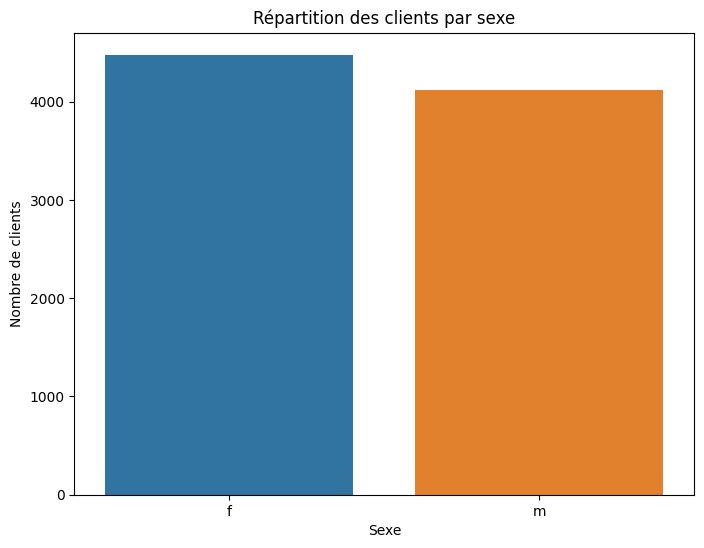

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df =final_table

# Diagramme à barres pour les catégories de sexe
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sex')
plt.title('Répartition des clients par sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de clients')
plt.show()

# Distribution de la récence des clients

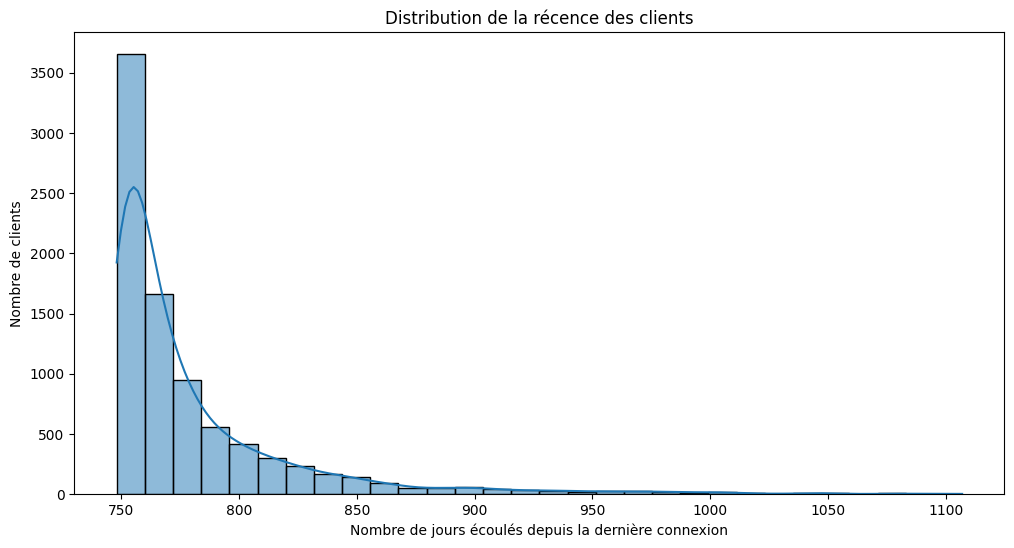

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df =final_table
# Diagramme à barres pour la récence
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='recence', bins=30, kde=True)
plt.title('Distribution de la récence des clients')
plt.xlabel('Nombre de jours écoulés depuis la dernière connexion')
plt.ylabel('Nombre de clients')
plt.show()

# Répartition des clients par année de naissance

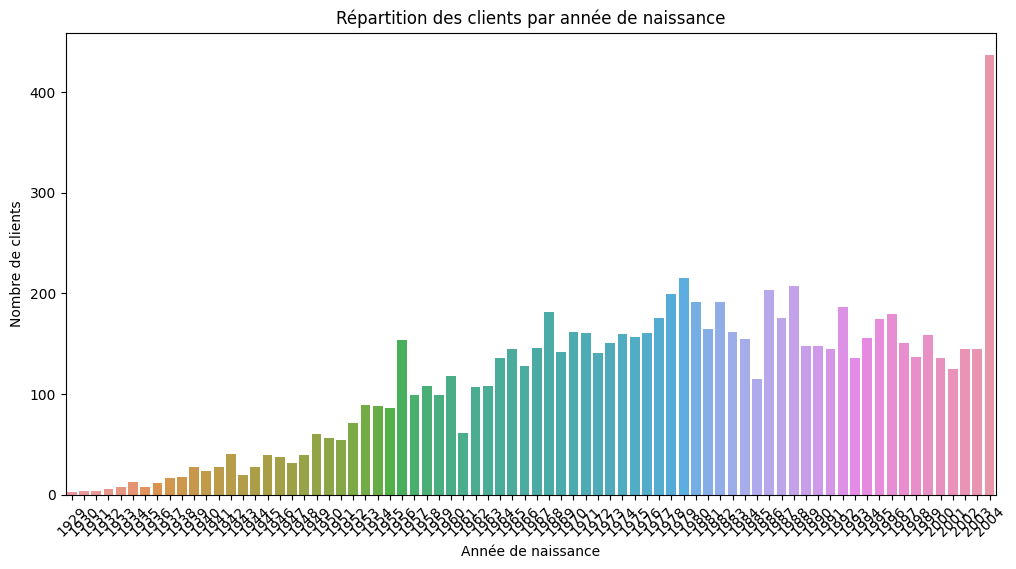

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df =result_df
# Diagramme à barres pour les années de naissance
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='birth')
plt.title('Répartition des clients par année de naissance')
plt.xlabel('Année de naissance')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45)
plt.show()


# Relation entre le panier moyen et le montant total dépensé

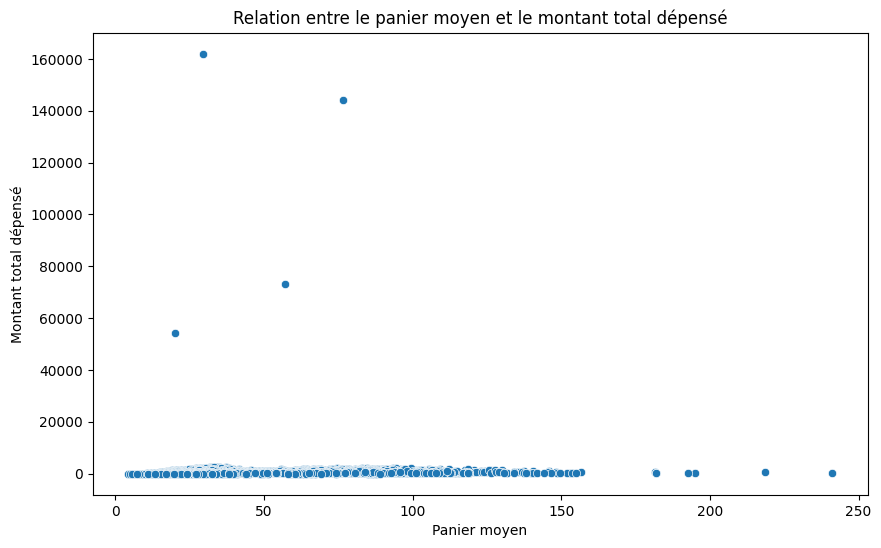

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Nuage de points entre le panier moyen et le total_price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='panier_moyen_freq', y='total_price')
plt.title('Relation entre le panier moyen et le montant total dépensé')
plt.xlabel('Panier moyen')
plt.ylabel('Montant total dépensé')
plt.show()

# Heatmap de la Matrice de Corrélation age/panier moyen

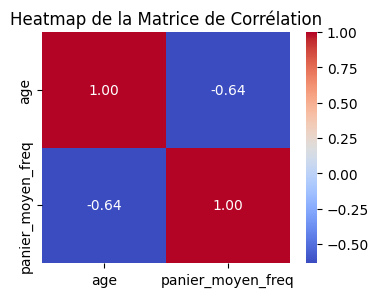

In [43]:
matrix_correlation = final_table[['age', 'panier_moyen_freq']].corr()
matrix_correlation



variables = ['age','panier_moyen_freq']

# Créer the heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(matrix_correlation, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=variables, yticklabels=variables)
plt.title("Heatmap de la Matrice de Corrélation")
plt.show()

# Heatmap de la Matrice de Corrélation avec toute les colonnes

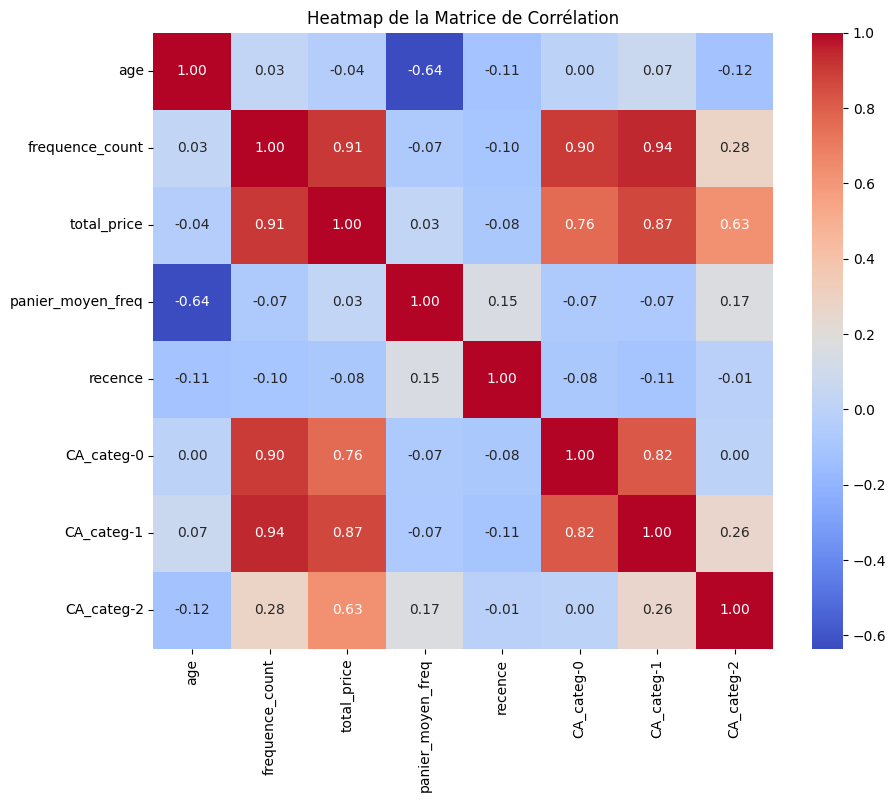

In [67]:
matrix_correlation = final_table[['age', 'frequence_count', 'total_price', 'panier_moyen_freq', 'recence', 'CA_categ-0', 'CA_categ-1', 'CA_categ-2'  ]].corr()
matrix_correlation



variables = ['age', 'frequence_count', 'total_price', 'panier_moyen_freq', 'recence', 'CA_categ-0', 'CA_categ-1', 'CA_categ-2']

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_correlation, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=variables, yticklabels=variables)
plt.title("Heatmap de la Matrice de Corrélation")
plt.show()

# Heatmap de la Matrice de Corrélation entre les  categories

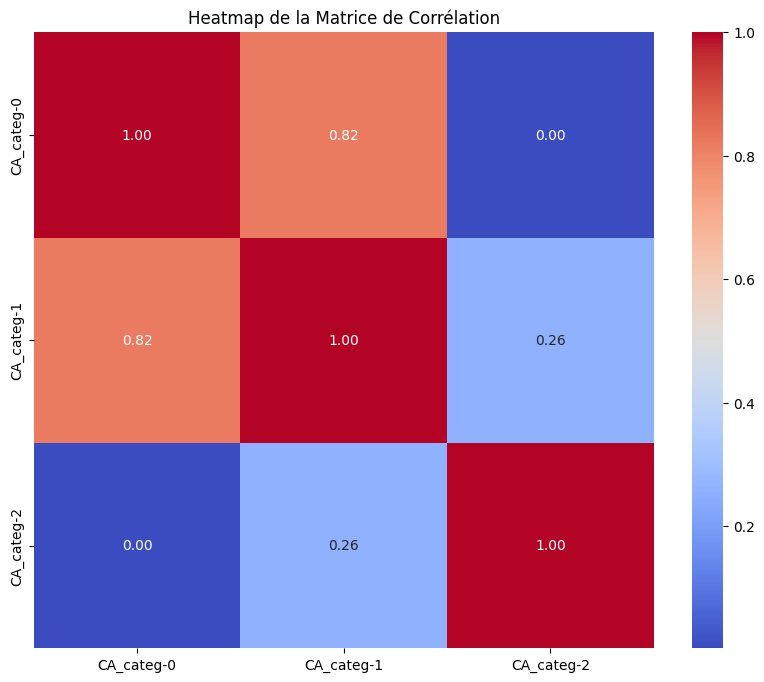

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
matrix_corr_CA = final_table[['CA_categ-0', 'CA_categ-1', 'CA_categ-2' ]].corr()
matrix_corr_CA 

variables = [ 'CA_categ-0', 'CA_categ-1', 'CA_categ-2' ]

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr_CA, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=variables, yticklabels=variables)
plt.title("Heatmap de la Matrice de Corrélation")
plt.show()

# Heatmap de la Matrice de Corrélation entre les fréquences et les catégories

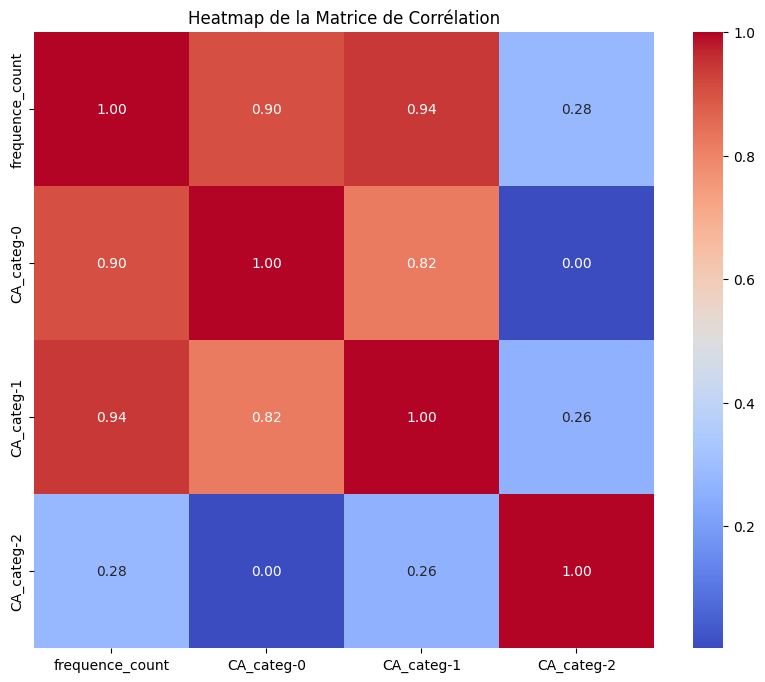

('frequence_count', 'total_price')

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
matrix_corr_CA = final_table[['frequence_count','CA_categ-0', 'CA_categ-1', 'CA_categ-2' ]].corr()
matrix_corr_CA 

variables = [ 'frequence_count','CA_categ-0', 'CA_categ-1', 'CA_categ-2' ]

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr_CA, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=variables, yticklabels=variables)
plt.title("Heatmap de la Matrice de Corrélation")
plt.show()
'frequence_count', 'total_price',

# Distribution de l'Âge des Clients

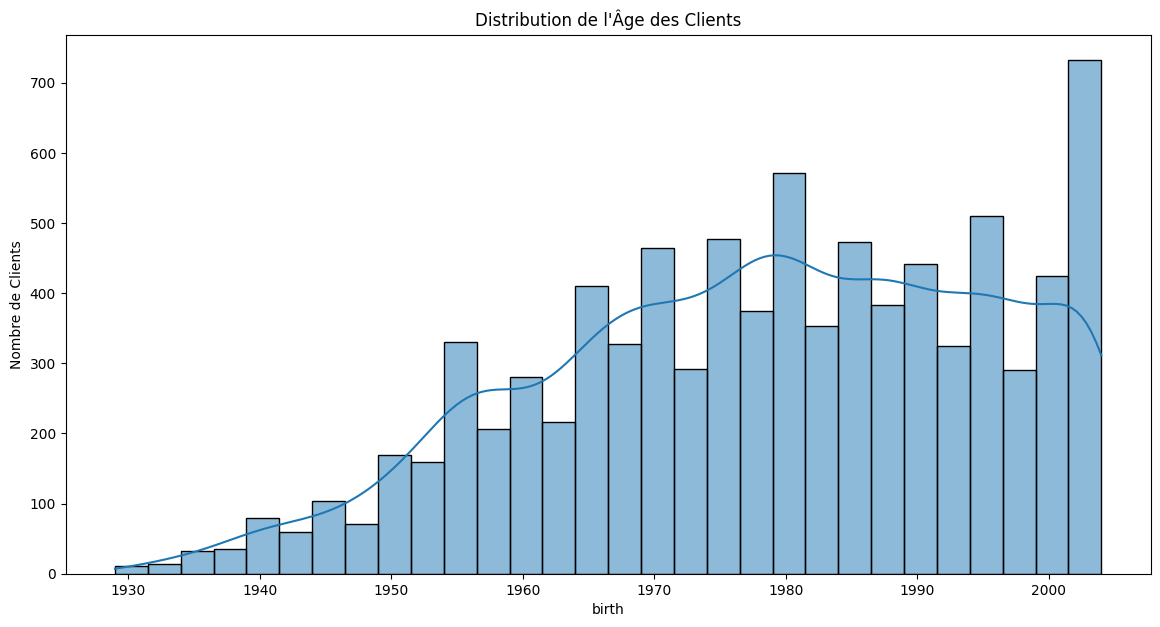

In [31]:
plt.figure(figsize=(14, 7))
sns.histplot(customers_df['birth'], bins=30, kde=True)
plt.title('Distribution de l\'Âge des Clients')
plt.xlabel('birth')
plt.ylabel('Nombre de Clients')
plt.show()

# Chiffre d'Affaires par Catégorie et Groupe d'Âge

<Figure size 1400x700 with 0 Axes>

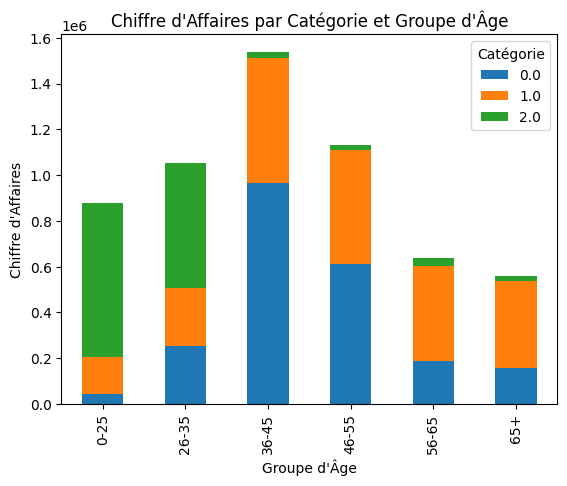

In [32]:
 final_customer_df = final_table
customers_age_categ = pd.merge(final_customer_df, merged_transactions_products_df, on='client_id')
customers_age_categ['age_group'] = pd.cut(customers_age_categ['age'], bins=[0, 25, 35, 45, 55, 65, 100], 
                                          labels=['0-25', '26-35', '36-45', '46-55', '56-65', '65+'])

ca_by_age_categ = customers_age_categ.groupby(['age_group', 'categ'])['price'].sum().unstack().fillna(0)

plt.figure(figsize=(14, 7))
ca_by_age_categ.plot(kind='bar', stacked=True)
plt.title('Chiffre d\'Affaires par Catégorie et Groupe d\'Âge')
plt.xlabel('Groupe d\'Âge')
plt.ylabel('Chiffre d\'Affaires')
plt.legend(title='Catégorie')
plt.show()

# Distribution des Prix par Catégorie

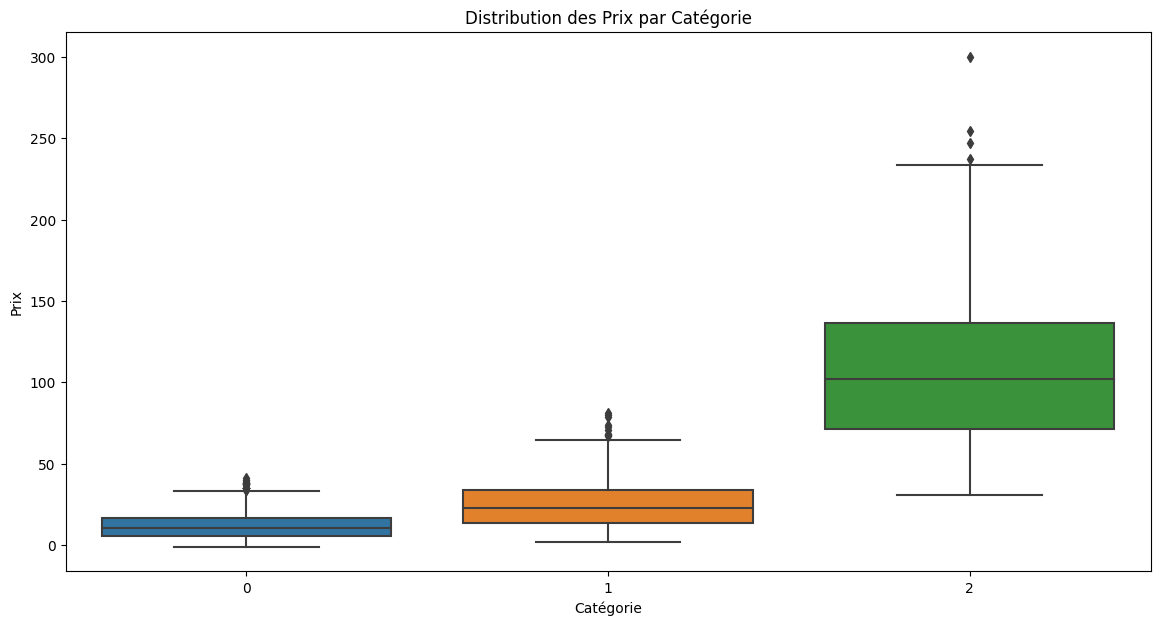

In [44]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='categ', y='price', data=products_df)
plt.title('Distribution des Prix par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Prix')
plt.show()

# Répartition du Chiffre d'Affaires par Catégorie

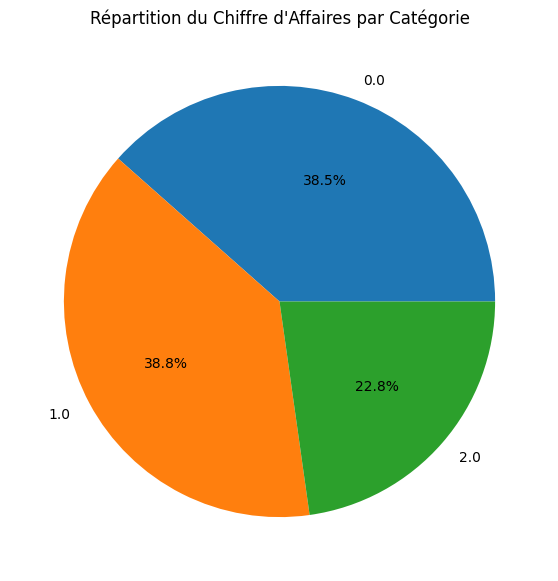

In [34]:
plt.figure(figsize=(7, 7))
merged_transactions_products_df.groupby('categ')['price'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition du Chiffre d\'Affaires par Catégorie')
plt.ylabel('') 
plt.show()

# Prix par catégorie et par âge

In [36]:
import plotly.express as px

df = final_table

fig = px.scatter(df, x="age", y="total_price", color="CA_categ-0", 
                 marginal_x="box", marginal_y="violin",
                 title="Prix total par catégorie")
fig.show()

In [39]:
import plotly.express as px

df = final_table

fig = px.scatter(df, x="age", y="total_price", color="CA_categ-1", 
                 marginal_x="box", marginal_y="violin",
                 title="Prix total par catégorie")
fig.show()

In [40]:
import plotly.express as px

df = final_table

fig = px.scatter(df, x="age", y="total_price", color="CA_categ-2", 
                 marginal_x="box", marginal_y="violin",
                 title="Prix total par catégorie")
fig.show()

# Corrélation entre le genre et les catégories des livres achetés

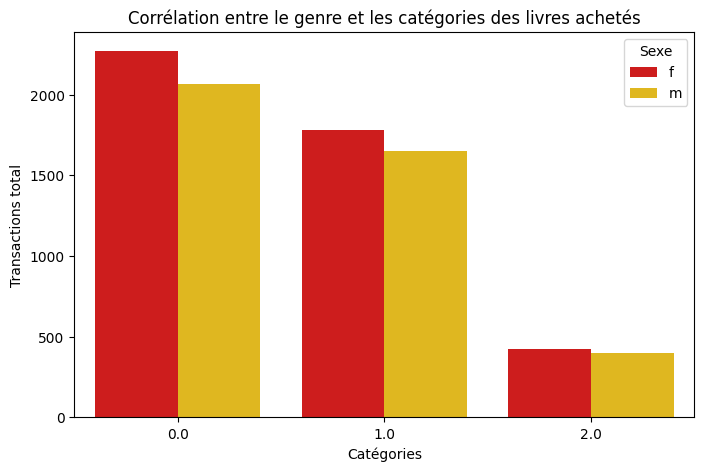

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = supp_invalide_date
df = pd.DataFrame(data)

grouped_df = df.groupby('client_id').agg(
    session_count=('session_id', 'nunique'),
    total_price=('price', 'sum')
).reset_index()

result_df = pd.merge(df[['client_id', 'id_prod', 'date', 'categ', 'sex', 'birth']], grouped_df, on='client_id').drop_duplicates(subset=['client_id'])

contingency_table = pd.crosstab(result_df['sex'], result_df['categ'])

plot_data = contingency_table.reset_index().melt(id_vars='sex', var_name='category', value_name='count')

plt.figure(figsize=(8, 5))
sns.barplot(data=plot_data, x='category', y='count', hue='sex', palette='hot')
plt.title('Corrélation entre le genre et les catégories des livres achetés')
plt.xlabel('Catégories')
plt.ylabel('Transactions total')
plt.legend(title='Sexe')
plt.show()